# Линейные модели, SVM и деревья решений.
## Задание
1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите следующие модели:
    - одну из линейных моделей;
    - SVM;
    - дерево решений.
5. Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.

## Выбор набора данных
Будем использовать набор данных "Диабет" для решения задачи регрессии.

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import *

In [2]:
data = load_diabetes()
pd_data = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])
pd_data.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


## Подготовка набора данных к работе

In [3]:
pd_data.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Набор данных не содержит пропусков. Выведем корреляционную матрицу:

<AxesSubplot:>

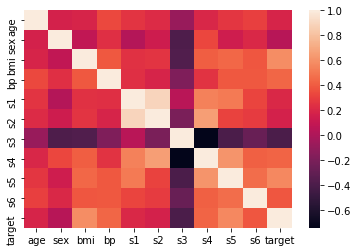

In [4]:
import seaborn as sns

sns.heatmap(pd_data.corr())

## Разделим датасет на обучающую и тестовую выборки
Для этого импортируем и используем метод train_test_split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    pd_data['s3'].values, pd_data['s4'].values, test_size=0.5, random_state=1)

## Обучение моделей
### Линейная модель LinearRegression

In [6]:
from sklearn.linear_model import LinearRegression

# Обучим модель линейной регрессии
regr1 = LinearRegression().fit(X_train.reshape(-1, 1), Y_train.reshape(-1, 1))

Построим график:

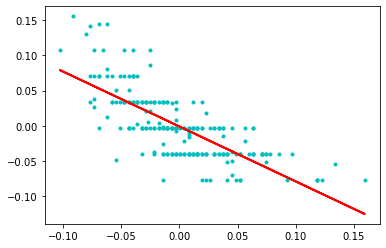

In [7]:
import matplotlib.pyplot as plt

y_array_regr = [regr1.coef_[0]*x+regr1.intercept_[0] for x in X_train]

plt.plot(X_train, Y_train, 'c.')
plt.plot(X_train, y_array_regr, 'r-', linewidth=2.0)
plt.show()

С помощью полученной модели предскажем значения для тествой выборки:

In [8]:
predict1 = regr1.predict(X_test.reshape(-1, 1))

In [9]:
# произведем оценку качества модели
from sklearn.metrics import median_absolute_error, r2_score 

mae1 = median_absolute_error(Y_test, predict1)
r_score_1 = r2_score(Y_test, predict1)

print(f"Median abolute error: {mae1}")
print(f"R^2: {r_score_1}")

Median abolute error: 0.02144051031787941
R^2: 0.5347384773881068


### Support vector machine (SVR)

Median abolute error: 0.020788317186459675
R^2: 0.5316195655638762


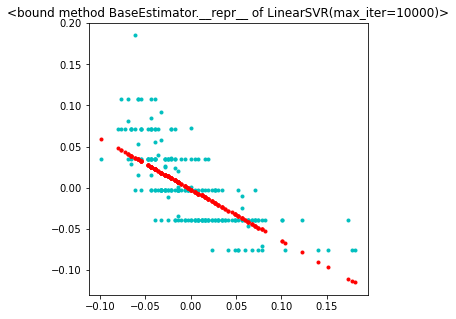

In [10]:
from sklearn.svm import LinearSVR, SVR

mae2 = []
r_score_2 = [] 

def plot_regr(clf):
    global mae2
    global r_score_2
    
    title = clf.__repr__
    clf.fit(X_train.reshape(-1, 1), Y_train)
    predict2 = clf.predict(X_test.reshape(-1, 1))
    
    mae2.append(median_absolute_error(Y_test, predict2))
    r_score_2.append(r2_score(Y_test, predict2))
    
    print(f"Median abolute error: {mae2[-1]}")
    print(f"R^2: {r_score_2[-1]}")
    
    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_title(title)
    ax.plot(X_test, Y_test, 'c.')
    ax.plot(X_test, predict2, 'r.')
    plt.show()

plot_regr(LinearSVR(C=1.0, max_iter=10000)) 

Median abolute error: 0.03818552453282823
R^2: -0.04648831980864476


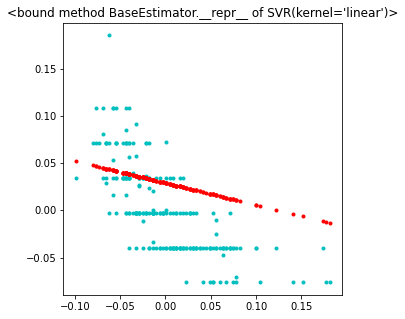

In [11]:
plot_regr(SVR(kernel='linear', C=1.0))

Median abolute error: 0.03883136812906149
R^2: -0.01273228206338306


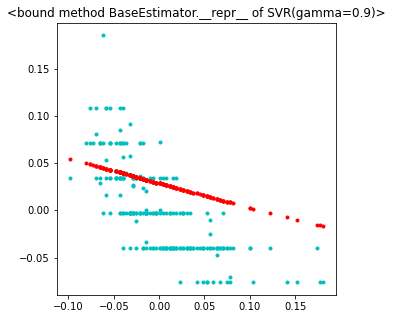

In [12]:
plot_regr(SVR(kernel='rbf', gamma=0.9, C=1.0))

### Дерево решений

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

n_range = np.array(range(1, 12, 1))
tuned_parameters = [{'max_depth': n_range}]

regr3 = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=5, scoring = 'r2')
regr3.fit(X_train.reshape(-1, 1), Y_train.reshape(-1, 1))
predict3 = regr3.predict(X_test.reshape(-1, 1))

print("Наиболее подходящая глубина дерева: {0}".format(regr3.best_params_))
print("Значение метрики: {0}".format(regr3.best_score_))

Наиболее подходящая глубина дерева: {'max_depth': 3}
Значение метрики: 0.5250303010574479


К сожалению никак не могу докачать модуль graphviz в виртуальное окружение анаконды, поэтому построить графически дерево не получается.

In [14]:
# произведем оценку качества модели
mae3 = median_absolute_error(Y_test, predict3)
r_score_3 = r2_score(Y_test, predict3)

print(f"Median abolute error: {mae3}")
print(f"R^2: {r_score_3}")

Median abolute error: 0.01630303619025818
R^2: 0.5636497977465196


## Вывод

In [15]:
print(f"Linear regression Median abolute error: {mae1}")
print(f"Linear regression R^2 score: {r_score_1}\n")

counter = 1
for r in mae2:
    print(f"SVM Median abolute error {counter}: {r}")
    counter += 1
counter = 1
for r in r_score_2:
    print(f"SVM R^2 score {counter}: {r_score_1}")
    counter += 1

print(f"\nSolution Tree Median abolute error: {mae3}")
print(f"Solution Tree R^2 score: \033[32m{r_score_3}\033[0m\n")


Linear regression Median abolute error: 0.02144051031787941
Linear regression R^2 score: 0.5347384773881068

SVM Median abolute error 1: 0.020788317186459675
SVM Median abolute error 2: 0.03818552453282823
SVM Median abolute error 3: 0.03883136812906149
SVM R^2 score 1: 0.5347384773881068
SVM R^2 score 2: 0.5347384773881068
SVM R^2 score 3: 0.5347384773881068

Solution Tree Median abolute error: 0.01630303619025818
Solution Tree R^2 score: 0.5636497977465196



Наилучший результат оценки получила модель Дерева решений, но при этом оценки остальных моделей отличаются всего на несколько "сотых"